In [1]:
from google.colab import files
uploaded=files.upload()

Saving creditcard.csv to creditcard.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Loading the imblearn lib
from imblearn.under_sampling import RandomUnderSampler, NearMiss, ClusterCentroids
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTEENN, SMOTETomek

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Loading the dataset

In [3]:
import io
data=pd.read_csv(io.BytesIO(uploaded["creditcard.csv"]))
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Number of Fraudulent and Non-Fraudulent observations in the dataset 

In [4]:
NonFraud_obs = len(data[data["Class"]==0])
Fraud_obs = len(data[data["Class"]==1])
print ("Number of non-fraudulent transactions are: ",NonFraud_obs)
print ("Number of fraudulent transactions are: ",Fraud_obs)

Number of non-fraudulent transactions are:  284315
Number of fraudulent transactions are:  492


Visualizing the above result

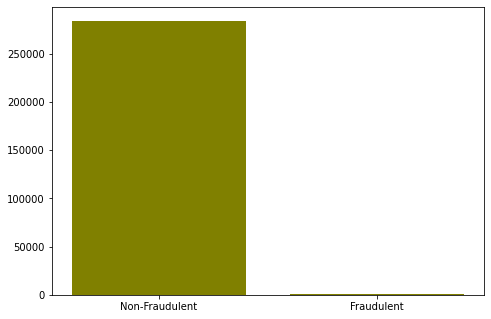

In [5]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
transactions = ['Non-Fraudulent','Fraudulent']
result = [NonFraud_obs,Fraud_obs]
ax.bar(transactions,result, color='olive')
plt.show()

## Scaling the "Amount" column and dropping the "Time" column

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data["Amount"] = scaler.fit_transform(data["Amount"].values.reshape(-1, 1))

data = data.drop(["Time"],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


## Spliting the dataset into Train and Test set

In [0]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,:29]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) ##change the random state
# print(X_train.shape)
# print(X_test.shape)

## Applying transformations to dataset

In [0]:
def transform(transformer,X,y):
    print("Transforming", transformer.__class__.__name__)
    X_resampled,y_resampled = transformer.fit_sample(X.values,y.values.ravel())
    return transformer.__class__.__name__,pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)

In [9]:
dataset = []
dataset.append(("base",X_train,y_train))
dataset.append(transform(RandomUnderSampler(),X_train,y_train))
dataset.append(transform(ClusterCentroids(),X_train,y_train))
dataset.append(transform(NearMiss(n_jobs=-1),X_train,y_train))
dataset.append(transform(RandomOverSampler(),X_train,y_train))
dataset.append(transform(SMOTE(n_jobs=-1),X_train,y_train))
dataset.append(transform(SMOTEENN(),X_train,y_train))
dataset.append(transform(SMOTETomek(),X_train,y_train))

Transforming RandomUnderSampler
Transforming ClusterCentroids


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Transforming NearMiss


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Transforming RandomOverSampler
Transforming SMOTE


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Transforming SMOTEENN


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Transforming SMOTETomek


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
#dataset

## Determining the best hyperparameter (Model used Logistic Regression) 

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

def opt_parameter(sample_type, X, y):
    log_reg = LogisticRegression(penalty = 'l2')
    param_grid ={'C':[0.01,0.1,1,10]}
    grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring="accuracy", cv=5, verbose=2)
    grid_search = grid_search.fit(X.values, y.values.ravel())
    return sample_type, grid_search.best_score_, grid_search.best_params_['C']

opt_parameters = []
for sample_type,X,y in dataset:
    print(sample_type)
    opt_parameters.append(opt_parameter(sample_type,X,y))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


base
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.1s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ........................................... C=0.01, total=   1.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.1s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.2s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   1.1s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   2.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   1.6s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   1.9s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   37.0s finished


RandomUnderSampler
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ..........................................................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................................. C=1, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
ClusterCentroids
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.01 ..........................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
NearMiss
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] ............................................. C=10, total=   0.1s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
RandomOverSampler
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................................... C=0.01, total=   3.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV] ........................................... C=0.01, total=   3.5s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   3.5s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   3.4s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   3.9s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   4.2s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   4.6s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   4.1s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.4min finished


SMOTE
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................................... C=0.01, total=   4.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV] ........................................... C=0.01, total=   3.7s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   3.8s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   3.8s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   4.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   4.3s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   4.9s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   4.0s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.5min finished


SMOTEENN
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................................... C=0.01, total=   3.7s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV] ........................................... C=0.01, total=   3.6s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   3.7s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   3.5s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   3.6s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   5.1s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   4.1s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   5.6s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.5min finished


SMOTETomek
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................................... C=0.01, total=   3.5s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV] ........................................... C=0.01, total=   3.9s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   3.8s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   3.5s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   3.5s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   4.6s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   3.9s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   4.3s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.5min finished


In [12]:
opt_parameters

[('base', 0.9991760492497834, 0.1),
 ('RandomUnderSampler', 0.9368492653727551, 0.01),
 ('ClusterCentroids', 0.9301469254489388, 1),
 ('NearMiss', 0.9543079992744422, 1),
 ('RandomOverSampler', 0.9485210991905001, 0.1),
 ('SMOTE', 0.9455220337394519, 1),
 ('SMOTEENN', 0.946123971887503, 10),
 ('SMOTETomek', 0.945444654624783, 10)]

## Training models for the transformed datasets

In [0]:
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score, precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve, classification_report

scores = []
for sample_type, score, param in opt_parameters:
    log_reg = LogisticRegression(penalty='l2', C=param)
    for sample, X, y in dataset:
        if sample==sample_type:
            log_reg.fit(X.values, y.values.ravel())
            pred_test = log_reg.predict(X_test.values)
            test_prob = log_reg.predict_proba(X_test.values)[:,1]
            #test_prob = log_reg.decision_function(X_test.values)
            fpr, tpr, threshold = roc_curve(y_test.values.ravel(), test_prob)
            p, r, t = precision_recall_curve(y_test.values.ravel(), pred_test)
            scores.append((sample_type, f1_score(y_test.values.ravel(),pred_test),
                           precision_score(y_test.values.ravel(),pred_test), 
                           recall_score(y_test.values.ravel(),pred_test), 
                           accuracy_score(y_test.values.ravel(),pred_test), 
                           auc(fpr, tpr), auc(r,p),
                           confusion_matrix(y_test.values.ravel(),pred_test)))

In [14]:
result = pd.DataFrame(scores,columns=['Sample Type','f1','precision','recall','accuracy','auc_roc','auc_pr','confusion_matrix'])
result

,Sample Type,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,base,0.752381,0.877778,0.658333,0.999270,0.975927,0.768343,"[[71071, 11], [41, 79]]"
1,RandomUnderSampler,0.230435,0.132500,0.883333,0.990056,0.981205,0.508015,"[[70388, 694], [14, 106]]"
2,ClusterCentroids,0.105941,0.056316,0.891667,0.974636,0.978160,0.474083,"[[69289, 1793], [13, 107]]"
3,NearMiss,0.007191,0.003609,0.950000,0.557878,0.927914,0.476847,"[[39608, 31474], [6, 114]]"
4,RandomOverSampler,0.120442,0.064497,0.908333,0.977641,0.984311,0.486492,"[[69501, 1581], [11, 109]]"
5,SMOTE,0.113636,0.060573,0.916667,0.975900,0.984911,0.488690,"[[69376, 1706], [10, 110]]"
6,SMOTEENN,0.111167,0.059172,0.916667,0.975296,0.985640,0.487989,"[[69333, 1749], [10, 110]]"
7,SMOTETomek,0.113695,0.060606,0.916667,0.975914,0.985016,0.488707,"[[69377, 1705], [10, 110]]"


# Using Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
scores = []
for sample, X, y in dataset:
  rfc = RandomForestClassifier(n_estimators = 300, criterion = 'entropy',bootstrap = True)      
  rfc.fit(X.values, y.values.ravel())
  pred_test = rfc.predict(X_test.values)
  test_prob = rfc.predict_proba(X_test.values)[:,1]
  fpr, tpr, threshold = roc_curve(y_test.values.ravel(), test_prob)
  p, r, t = precision_recall_curve(y_test.values.ravel(), pred_test)
  scores.append((sample, f1_score(y_test.values.ravel(),pred_test),
                  precision_score(y_test.values.ravel(),pred_test), 
                  recall_score(y_test.values.ravel(),pred_test), 
                  accuracy_score(y_test.values.ravel(),pred_test), 
                  auc(fpr, tpr), auc(r,p),
                  confusion_matrix(y_test.values.ravel(),pred_test)))

In [16]:
result = pd.DataFrame(scores,columns=['Sample Type','f1','precision','recall','accuracy','auc_roc','auc_pr','confusion_matrix'])
result

,Sample Type,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,base,0.845455,0.930000,0.775000,0.999522,0.951331,0.852690,"[[71075, 7], [27, 93]]"
1,RandomUnderSampler,0.148097,0.080755,0.891667,0.982711,0.979609,0.486302,"[[69864, 1218], [13, 107]]"
2,ClusterCentroids,0.011741,0.005909,0.916667,0.739937,0.963554,0.461358,"[[52575, 18507], [10, 110]]"
3,NearMiss,0.003449,0.001728,0.983333,0.042429,0.915038,0.492545,"[[2903, 68179], [2, 118]]"
4,RandomOverSampler,0.860987,0.932039,0.800000,0.999565,0.967628,0.866188,"[[71075, 7], [24, 96]]"
5,SMOTE,0.859574,0.878261,0.841667,0.999537,0.979787,0.860097,"[[71068, 14], [19, 101]]"
6,SMOTEENN,0.817814,0.795276,0.841667,0.999368,0.977973,0.818605,"[[71056, 26], [19, 101]]"
7,SMOTETomek,0.858369,0.884956,0.833333,0.999537,0.986675,0.859285,"[[71069, 13], [20, 100]]"
